### DSC 540 Week 2 Data Wrangling with Python: 
### Activity 7  Generating Stats from a csv file & 8 & SQL lite
### Author: Brian Reppeto 1/13/2024

In [1]:
# import libraries

from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
# open and read the file "List of countries by GDP (nominal) - Wikipedia.htm",parse it using BeautifulSoup

fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r")
soup = bs(fd)
fd.close()

In [3]:
# find the total number of tables in the HTML content using BeautifulSoup

all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 9 


In [4]:
# locate the table with the class wikitable

data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


In [5]:
# extract the contents of the first row of a table (tr) within a table body (tbody) and print 
# the number of table data/cell elements (td) in that row.

sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [6]:
# extract the contents of the second row of a table tr 
# within a table body tbody and then further extracting the individual cells td in that row at index 1

data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [7]:
# create a list which corresponds to a td from the original data list

data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [8]:
# find the len of the data_tables list

len(data_tables)

3

In [9]:
# create a list by looping over the source list and print the source names

source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [10]:
# create a list by looping over the source list and return the table headings

header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [11]:
# extract the rows of data from the first table

rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [12]:
# create a list by looping over each tr and strip the white spaces and return the data rows

data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [13]:
# create a data frame with the prior list and headers

df1 = pd.DataFrame(data_rows1, columns=header1)

In [14]:
# head the new DF

df1.head()

Rank         Country  GDP(US$MM)
0    1   United States  19,390,600
1    2      China[n 1]  12,014,610
2    3           Japan   4,872,135
3    4         Germany   3,684,816
4    5  United Kingdom   2,624,529

In [15]:
# create a list by looping over the source list and return the table headings

header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [16]:
# extract the rows of data from the first table

rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [17]:
# function to extract text from (td) based on the value of i return the stripped text content

def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [18]:
# create a list by looping over each tr and strip the white spaces and return the data rows

data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [19]:
# create a data frame with the prior list and headers

df2 = pd.DataFrame(data_rows2, columns=header2)

In [20]:
# head the new DF

df2.head()

Rank             Country  GDP(US$MM)
0    1       United States  19,390,604
1       European Union[23]  17,277,698
2    2          China[n 4]  12,237,700
3    3               Japan   4,872,137
4    4             Germany   3,677,439

In [21]:
# create a list by looping over the source list and return the table headings

header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [22]:
# extract the rows of data from the first table

rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [23]:
# create a list by looping over each tr and strip the white spaces and return the data rows

data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [24]:
# create a data frame with the prior list and headers

df3 = pd.DataFrame(data_rows3, columns=header3)

# head the new DF

df3.head()

Rank             Country  GDP(US$MM)
0    1       United States  19,390,604
1       European Union[23]  17,277,698
2    2          China[n 4]  12,237,700
3    3               Japan   4,872,137
4    4             Germany   3,677,439

### Activity 8

In [25]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [26]:
# read the visit_data csv and create a DF

df = pd.read_csv("visit_data.csv")

In [27]:
# head the DF to see the DF

df.head()

id first_name last_name                       email gender  \
0   1      Sonny      Dahl            sdahl0@mysql.com   Male   
1   2        NaN       NaN           dhoovart1@hud.gov    NaN   
2   3        Gar     Armal      garmal2@technorati.com    NaN   
3   4    Chiarra     Nulty       cnulty3@newyorker.com    NaN   
4   5        NaN       NaN  sleaver4@elegantthemes.com    NaN   

        ip_address   visit  
0    135.36.96.183  1225.0  
1  237.165.194.143   919.0  
2   166.43.137.224   271.0  
3   139.98.137.108  1002.0  
4    46.117.117.27  2434.0

In [28]:
# search for duplicates in first, last and email, then print if there are dups

print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
print("Email is duplictaed - {}".format(any(df.email.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False


In [29]:
# search for not a nuber in email, ip address and visit, then print if there are NAN


print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


In [30]:
# remove rows from the df where the 'visit' column has NaN

size_prev = df.shape
df = df[np.isfinite(df['visit'])] 
size_after = df.shape

In [31]:
# indicate the # of rows before and after the filter on the 'visit' column in the df

print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x12f1cdd50>,
 'caps': [<matplotlib.lines.Line2D at 0x12f1cf650>,
 'boxes': [<matplotlib.lines.Line2D at 0x12f1ccd10>],
 'medians': [<matplotlib.lines.Line2D at 0x12f1d4f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x12f1d5990>],
 'means': []}

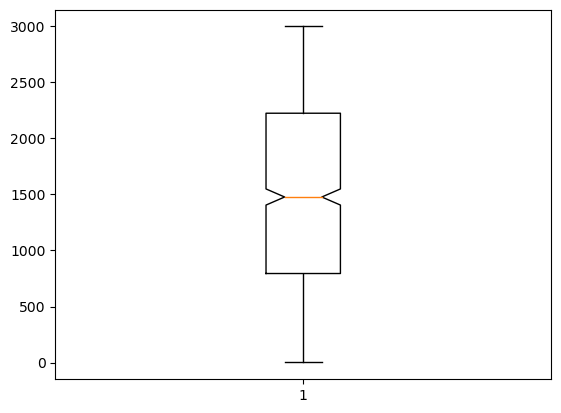

In [32]:
#  create a boxplot of the 'visit' column

plt.boxplot(df.visit, notch=True)

In [33]:
# create a new df to include only rows where the values in the 'visit' column are between 100 and 2900 

df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]  

In [34]:
# print the number of rows and columns in the df1 after the removal of outliers

print("After getting rid of outliers the new size of the data is - {}".format(*df1.shape))

After getting rid of outliers the new size of the data is - 923


### Exercise 3

In [35]:
# import the libraries

import sqlite3

In [36]:
# create a connection to a SQLite database

conn = sqlite3.connect('mydata.db')

In [38]:
# create a cursor object to interact with the SQLite database
# and printing a message indicating the initialization of the database

cursor = conn.cursor()
print('DB Init')

DB Init


In [39]:
# drop CUSTOMER table if already exists

cursor.execute("DROP TABLE IF EXISTS CUSTOMER")

# creating table as per requirement

sql ='''CREATE TABLE CUSTOMER(
   NAME CHAR(50) NOT NULL,
   ADDRESS VAR(50),
   CITY VAR(30),
   STATE CHAR(2),
   ZIP INT,
   PHONE_NUMBER INT NOT NULL
)'''
cursor.execute(sql)
print("Table created successfully........")

# commit changes to the database

conn.commit()


Table created successfully........


In [40]:
# Prepare sql queries to INSERT records into the database

cursor.execute('''INSERT INTO CUSTOMER(
   NAME , ADDRESS, CITY, STATE, ZIP  ,PHONE_NUMBER) VALUES 
   ('Brian Reppeto', '3709 McDonald Dr.', 'Knoxville','TN' ,37092, 8655555555),
   ('Evan Reppeto','1111 Stone St.','Cincinnati','OH',45000,5135555550),
   ('Lisa Holman','1234 Smith St.','Cincinnati','OH',45000,5135555551),
   ('Addy Reppeto','345 My St.','Cincinnati','OH',45000,5135555552),
   ('Kristen Schoenhoft','799 Holly Ave','Cincinnati','OH',45000,5135555553),
   ('Jeff Essau','300 Vine St.','Cincinnati','OH',45000,5135555554),
   ('Rob Schoenhoft','Reading Rd.','Cincinnati','OH',45000,5135555555),
   ('Todd Cole','325 Forest Dr.','Cincinnati','OH',45000,5135555556),
   ('Emma Myers','2090 Little Turtle','Cincinnati','OH',45000,5135555557),
   ('Jamie Eversole','Easy St.','Cincinnati','OH',45000,5135555558)''')

# Commit changes to the database

conn.commit()
print("Records inserted........")

Records inserted........


In [43]:
# connect to sqlite

conn = sqlite3.connect('mydata.db')

# execute the SQL query to select all rows from a table (replace 'your_table_name' with the actual table name)
query = 'SELECT * FROM CUSTOMER'
cursor.execute(query)

# Fetch all rows from the table

result = cursor.fetchall();
print(result)

[('Brian Reppeto', '3709 McDonald Dr.', 'Knoxville', 'TN', 37092, 8655555555), ('Evan Reppeto', '1111 Stone St.', 'Cincinnati', 'OH', 45000, 5135555550), ('Lisa Holman', '1234 Smith St.', 'Cincinnati', 'OH', 45000, 5135555551), ('Addy Reppeto', '345 My St.', 'Cincinnati', 'OH', 45000, 5135555552), ('Kristen Schoenhoft', '799 Holly Ave', 'Cincinnati', 'OH', 45000, 5135555553), ('Jeff Essau', '300 Vine St.', 'Cincinnati', 'OH', 45000, 5135555554), ('Rob Schoenhoft', 'Reading Rd.', 'Cincinnati', 'OH', 45000, 5135555555), ('Todd Cole', '325 Forest Dr.', 'Cincinnati', 'OH', 45000, 5135555556), ('Emma Myers', '2090 Little Turtle', 'Cincinnati', 'OH', 45000, 5135555557), ('Jamie Eversole', 'Easy St.', 'Cincinnati', 'OH', 45000, 5135555558)]


In [44]:
# Close the cursor
    
    
cursor.close()